# Analisis de datos (graficos)

En esta seccion se procederan a analizar los datos previos del proyecto de movilidad de Nuevo Leon por medio de graficos generados en python. Para una mejor interpretacion de los datos, consultar el pdf con la presentacion de los resultados.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#modificar colores y porcentaje en eje
from matplotlib import cm
from matplotlib.ticker import PercentFormatter

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
#Load all datasets
mp=pd.read_csv('municipios.csv')
gasto=pd.read_csv('Gasto_trim_transp_NL_modeled.csv')
ing=pd.read_csv('ingreso_trim_hogarNL_modeled.csv')
populi=pd.read_csv('poblacion_total_prediccion.csv')
trans=pd.read_csv('transporte_nl_inegi_limpio.csv')

In [3]:
gasto.head(2)

,year,gasto
0,2022,1642.0
1,2020,1431.0


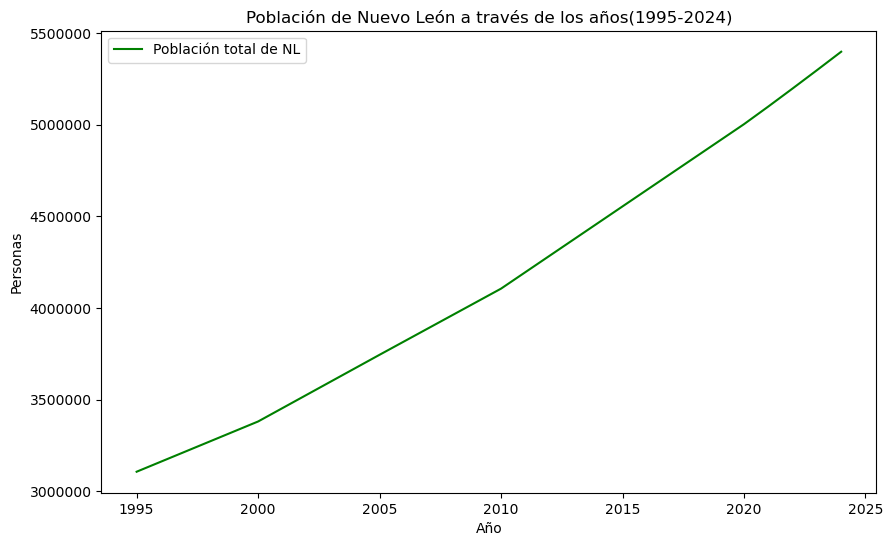

In [4]:
plt.figure(figsize=(10, 6))
# Agrupar poblacion por año y calcular la poblacion en el estado
df_new = populi.groupby('Year')['Poblacion_total'].sum()
# Hacer plot
df_new.plot(x=df_new.index, y=df_new.values, color= 'green',label='Población total de NL')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Año')
plt.ylabel('Personas')
plt.title('Población de Nuevo León a través de los años(1995-2024)')
plt.legend()
plt.show()

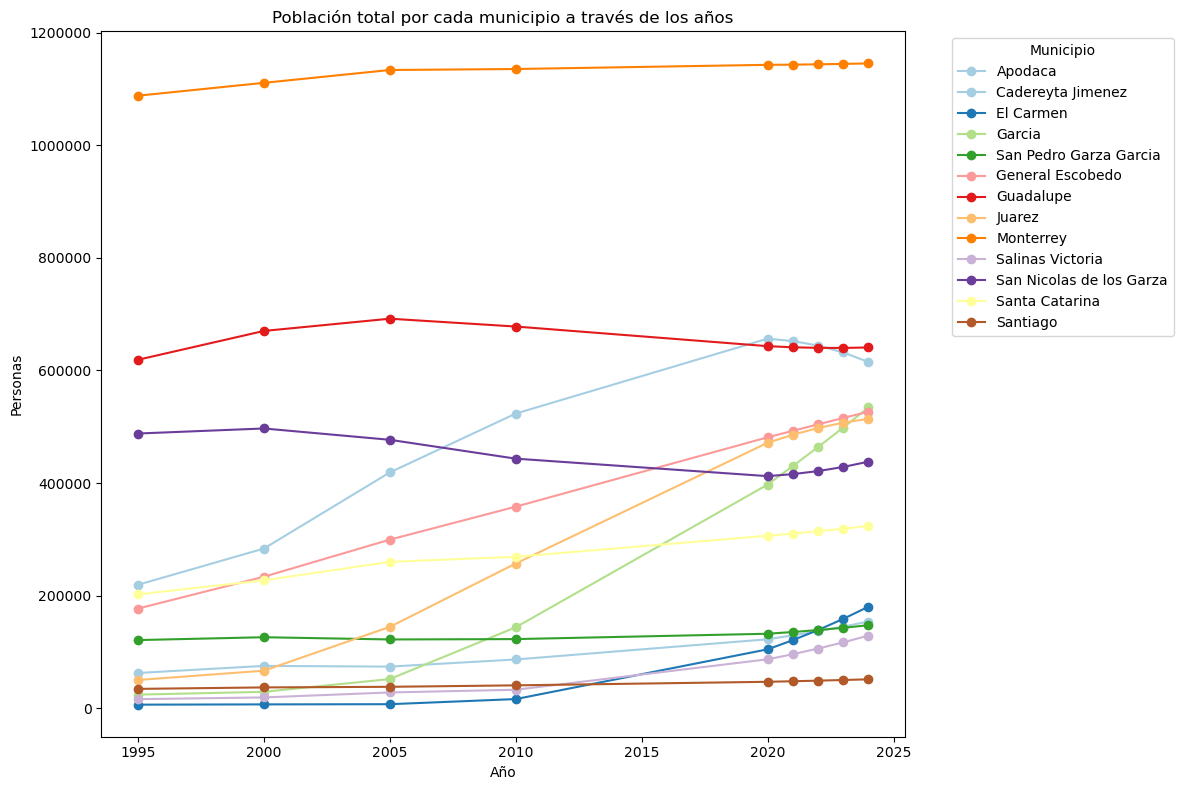

In [4]:
##Colores de las lineas
colormap = cm.get_cmap('Paired')
#poner el nombre a los municipios
todd = pd.merge(populi, mp, on= 'code')
# Poner año como index
todd.set_index('Year', inplace=True)
# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for i, muni in enumerate(todd['municipio'].unique()):
    data = todd[todd['municipio'] == muni]
    plt.plot(data.index, data['Poblacion_total'], label=muni, marker='o',
            color=colormap(i / len(todd['municipio'].unique())))

# Etiquetas, legenda, titulo
plt.legend(title="Municipio", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Personas")
plt.xlabel("Año")
plt.title("Población total por cada municipio a través de los años")
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.tight_layout()
plt.show()

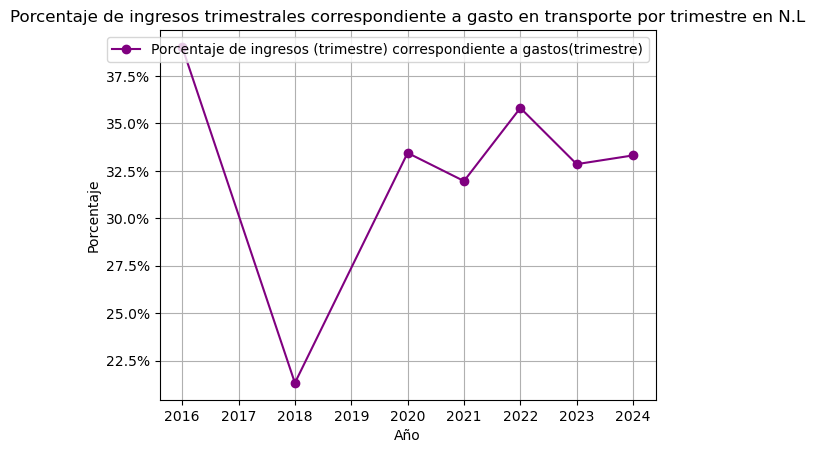

In [6]:
#Crear porcentaje de ingresos que corresponde a gastos de transporte a traves de los años
pearl= pd.merge(ing, gasto, on= 'year')
#Hacer nueva columna donde se calcula la razon del gasto e ingreso
pearl['percentage']= pearl['ingreso']/pearl['gasto'].replace(0, pd.NA) #.replace(0,NA)en caso de divisiones con 0

#En este caso hay que recordar ordenar por año para evitar lineas sin sentido
pearl = pearl.sort_values(by="year")

plt.plot(pearl['year'],pearl['percentage'], color= 'purple', marker='o',
         label='Porcentaje de ingresos (trimestre) correspondiente a gastos(trimestre)')
#Modificar 'y' para mostrar porcentaje
plt.gca().yaxis.set_major_formatter(PercentFormatter(100,decimals=None))
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de ingresos trimestrales correspondiente a gasto en transporte por trimestre en N.L')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

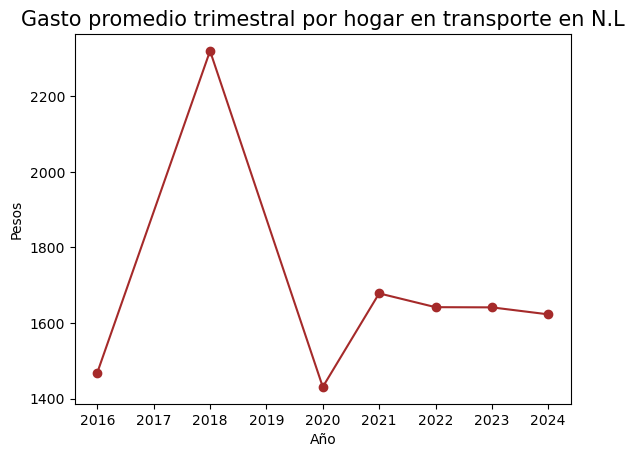

In [7]:
gasto=gasto.sort_values(by='year')
plt.plot(gasto['year'],gasto['gasto'], color= 'brown', marker='o')
plt.xlabel('Año',fontsize=10)
plt.ylabel('Pesos',fontsize=10)
plt.title('Gasto promedio trimestral por hogar en transporte en N.L', fontsize= 15)
plt.show()

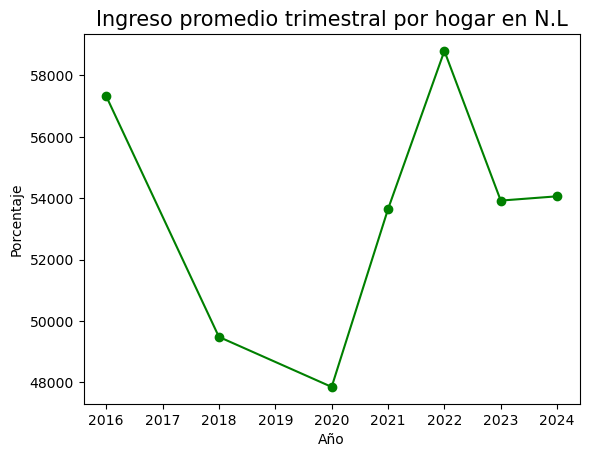

In [8]:
ing=ing.sort_values(by='year')
plt.plot(ing['year'],ing['ingreso'], color= 'green', marker='o')
plt.xlabel('Año',fontsize=10)
plt.ylabel('Porcentaje',fontsize=10)
plt.title('Ingreso promedio trimestral por hogar en N.L', fontsize= 15)
plt.show()

Text(0.5, 1.0, 'Relación gasto trimestral en transporte y población de N.L')

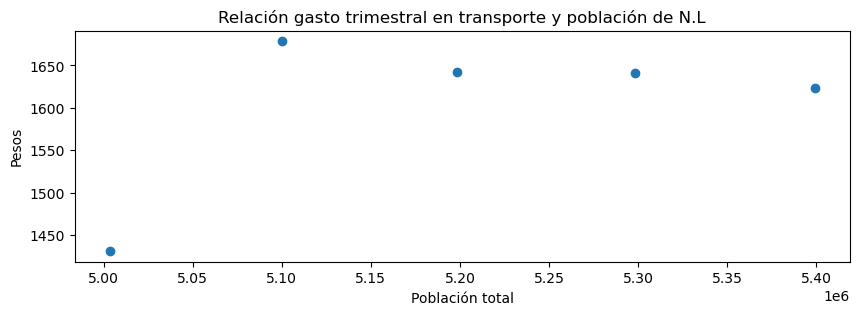

In [9]:
#Utilizamos el previo dataframe "df_new" del primer grafico para el siguiente.
df= pd.DataFrame(df_new)
df = df.reset_index()  # Resetear el índice para convertir "Year" en columna
df.columns = ["year", "Poblacion_total"]  # Renombrar las columnas a year en vez de Year
p= pd.merge(ing, df, on= 'year')
garnett= pd.merge(p, gasto, on= 'year')

fig=plt.figure(figsize=(10, 3))
plt.scatter(x='Poblacion_total', y='gasto', data=garnett)
plt.xlabel('Población total')
plt.ylabel('Pesos')
plt.title('Relación gasto trimestral en transporte y población de N.L')


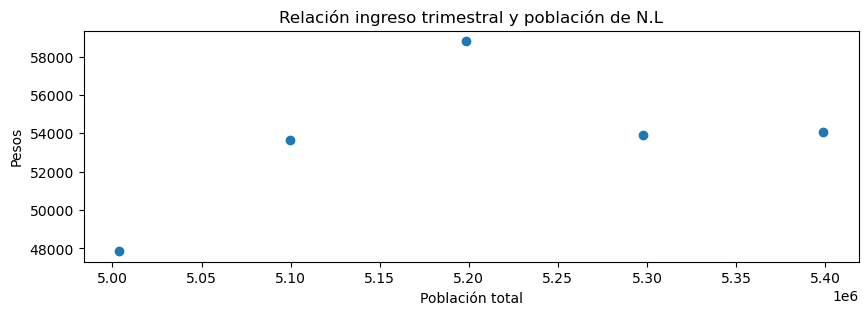

In [10]:
fig=plt.figure(figsize=(10, 3))
plt.scatter(x='Poblacion_total', y='ingreso', data= garnett)
plt.xlabel('Población total')
plt.ylabel('Pesos')
plt.title('Relación ingreso trimestral y población de N.L')
plt.show()

## Analisis datos de transporte

In [14]:
trans.head()

,Unidades en operacion de L-V,Unidades en operacion de S-D,Miles de km recorridos,Pasajeros transportados-total,month,year,ecovia,metro,metrobus,transmetro,Pasajeros transportados-tarifa completa,Pasajeros transportados-con descuento,Pasajeros transportados-con cortesia,Numero de rutas,Personal ocupado,Ingresos miles de pesos de pasajes,Miles de KWH consumido
0,38.0,25.0,254.439,811646.0,Mayo,2020,1,0,0,0,557095.0,137544.0,117007.0,NaN,NaN,NaN,NaN
1,39.0,24.0,248.738,1024395.0,Junio,2020,1,0,0,0,694198.0,182774.0,147423.0,NaN,NaN,NaN,NaN
2,38.0,24.0,237.267,967217.0,Julio,2020,1,0,0,0,659557.0,170705.0,136955.0,NaN,NaN,NaN,NaN
3,36.0,18.0,232.032,1006437.0,Agosto,2020,1,0,0,0,687297.0,173924.0,145216.0,NaN,NaN,NaN,NaN
4,37.0,21.0,230.899,1007431.0,Septiembre,2020,1,0,0,0,691080.0,176052.0,140299.0,NaN,NaN,NaN,NaN


In [15]:
#primero hay que cambiar los valores de los sistemas de transporte a una sola columna
# Función que recibe un DataFrame y una lista de columnas para filtrar
def columna_transporte(row, columnas_1):
    for col in columnas_1:
        if row[col] == 1:
            return col  # Retorna directamente el nombre de la columna
    return None  # Si no hay 1 en ninguna columna

In [16]:
# Lista de columnas en las que queremos buscar valores '1'
columnas_search = ['ecovia', 'metro', 'metrobus', 'transmetro']
trans['Medio'] = trans.apply(lambda row: columna_transporte(row, columnas_search), axis=1)
trans.head(4)

,Unidades en operacion de L-V,Unidades en operacion de S-D,Miles de km recorridos,Pasajeros transportados-total,month,year,ecovia,metro,metrobus,transmetro,Pasajeros transportados-tarifa completa,Pasajeros transportados-con descuento,Pasajeros transportados-con cortesia,Numero de rutas,Personal ocupado,Ingresos miles de pesos de pasajes,Miles de KWH consumido,Medio
0,38.0,25.0,254.439,811646.0,Mayo,2020,1,0,0,0,557095.0,137544.0,117007.0,NaN,NaN,NaN,NaN,ecovia
1,39.0,24.0,248.738,1024395.0,Junio,2020,1,0,0,0,694198.0,182774.0,147423.0,NaN,NaN,NaN,NaN,ecovia
2,38.0,24.0,237.267,967217.0,Julio,2020,1,0,0,0,659557.0,170705.0,136955.0,NaN,NaN,NaN,NaN,ecovia
3,36.0,18.0,232.032,1006437.0,Agosto,2020,1,0,0,0,687297.0,173924.0,145216.0,NaN,NaN,NaN,NaN,ecovia


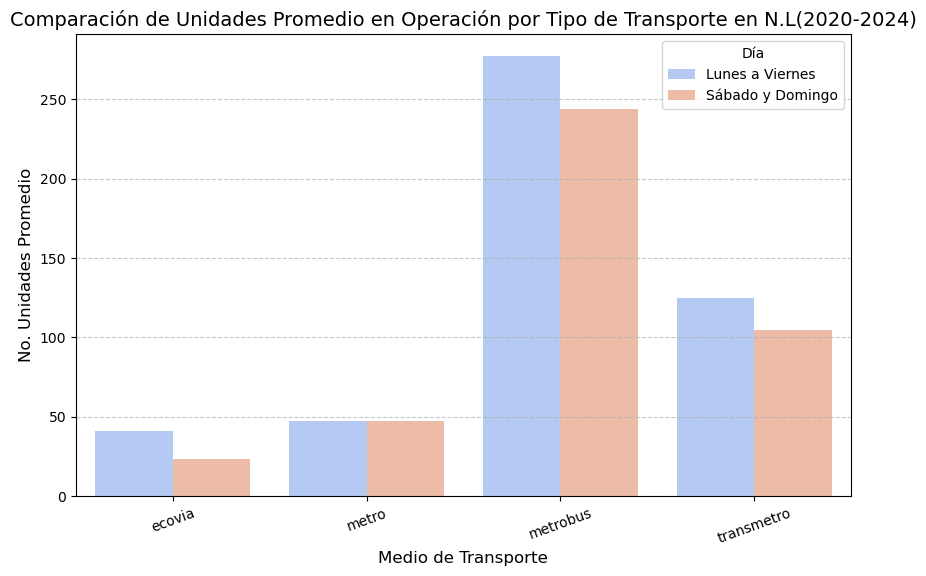

In [22]:
alo= trans
mix=alo[['Unidades en operacion de L-V','Unidades en operacion de S-D','Medio']].groupby('Medio').mean().reset_index()
# Reestructurar datos para facilitar visualización en Seaborn(Voltear dos columnas a varias filas para mejor lectura del df)
df_melted = mix.melt(id_vars="Medio", 
                          var_name="Día", 
                          value_name="Unidades Promedio")

# Renombrar categorías para mayor claridad
df_melted["Día"] = df_melted["Día"].replace({
    "Unidades en operacion de L-V": "Lunes a Viernes",
    "Unidades en operacion de S-D": "Sábado y Domingo"
})

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Medio", y="Unidades Promedio", hue="Día", palette="coolwarm")

# Personalizar el gráfico
plt.title("Comparación de Unidades Promedio en Operación por Tipo de Transporte en N.L(2020-2024)", fontsize=14)
plt.xlabel("Medio de Transporte", fontsize=12)
plt.ylabel("No. Unidades Promedio", fontsize=12)
plt.legend(title="Día")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()

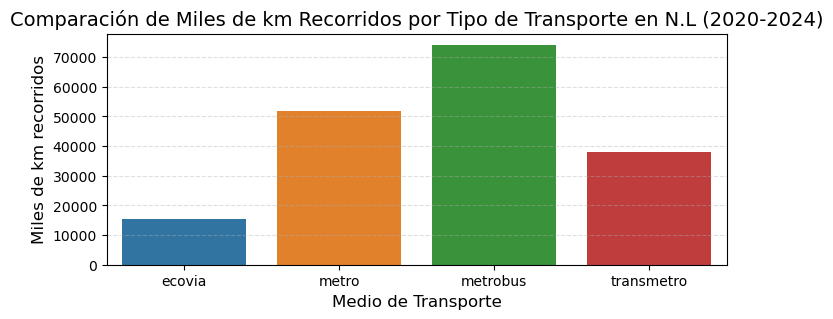

In [23]:
amethyst= trans[['Medio','Miles de km recorridos']].groupby('Medio').sum().reset_index()
plt.figure(figsize=(8, 3))
sns.barplot(data=amethyst, x="Medio", y="Miles de km recorridos")

# Personalizar el gráfico
plt.title("Comparación de Miles de km Recorridos por Tipo de Transporte en N.L (2020-2024)", fontsize=14)
plt.xlabel("Medio de Transporte", fontsize=12)
plt.ylabel("Miles de km recorridos", fontsize=12)
plt.xticks()
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Mostrar gráfico
plt.show()

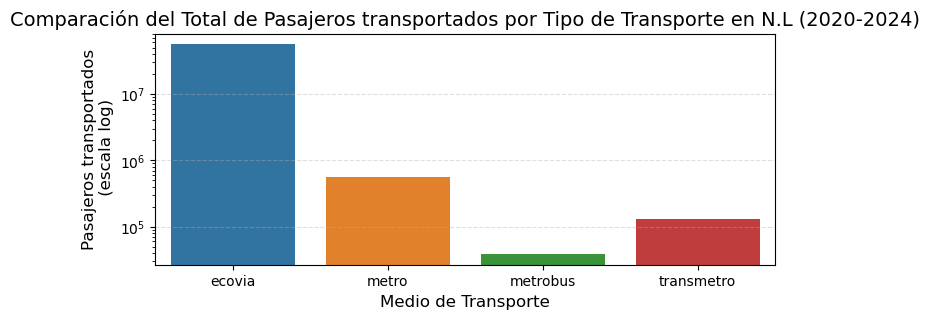

In [24]:
steven= trans[['Medio','Pasajeros transportados-total']].groupby('Medio').sum().reset_index()
plt.figure(figsize=(8, 3))
sns.barplot(data=steven, x="Medio", y="Pasajeros transportados-total")

# Personalizar el gráfico
plt.title("Comparación del Total de Pasajeros transportados por Tipo de Transporte en N.L (2020-2024)", fontsize=14)
plt.xlabel("Medio de Transporte", fontsize=12)
plt.ylabel("Pasajeros transportados\n (escala log)", fontsize=12)
plt.xticks()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.yscale("log")

# Mostrar gráfico
plt.show()

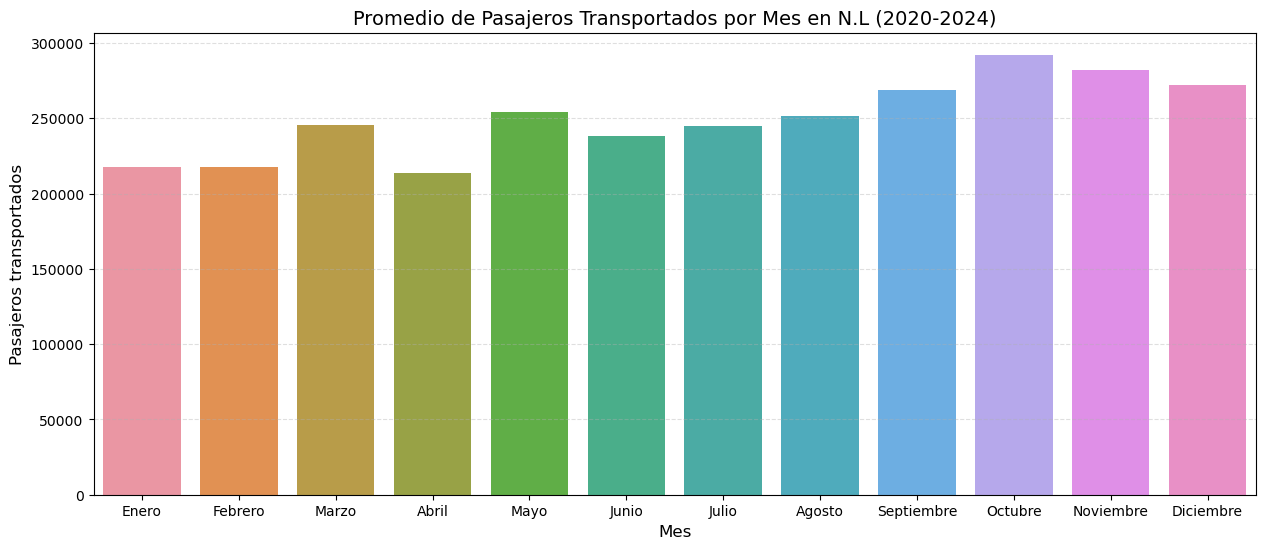

In [25]:
alana= trans[['month','Pasajeros transportados-total']].groupby('month').mean().reset_index()
meses=['Enero','Febrero','Marzo','Abril', 'Mayo','Junio', 'Julio', 'Agosto','Septiembre','Octubre','Noviembre', 'Diciembre']
alana['month']= pd.Categorical(alana['month'], categories=meses, ordered=True)
plt.figure(figsize=(15, 6))
sns.barplot(data=alana, x="month", y="Pasajeros transportados-total")

# Personalizar el gráfico
plt.title("Promedio de Pasajeros Transportados por Mes en N.L (2020-2024)", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Pasajeros transportados", fontsize=12)
plt.xticks()
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Mostrar gráfico
plt.show()

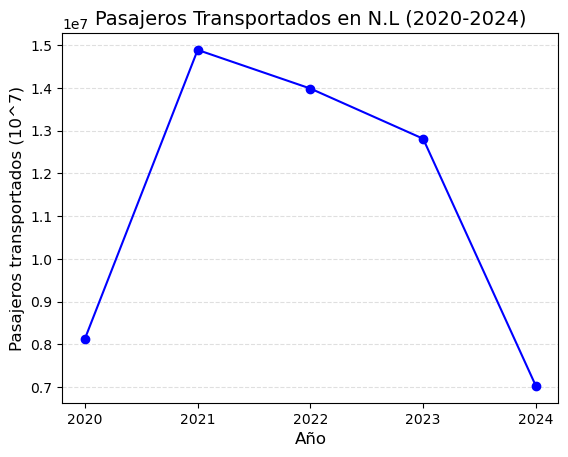

In [26]:
lance=trans[['year','Pasajeros transportados-total']].groupby('year').sum().reset_index()
lance.sort_values(by= 'year')

plt.plot(lance['year'],lance['Pasajeros transportados-total'], color= 'blue', marker='o')
# Personalizar el gráfico
plt.title("Pasajeros Transportados en N.L (2020-2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Pasajeros transportados (10^7)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(np.arange(2020, 2025, 1))# Mostrar el rango de etiquetas en eje x
# Mostrar gráfico
plt.show()
##NOTA: Considerar que del 2024 faltan los resultados de Nov y Dic en todos los servicios

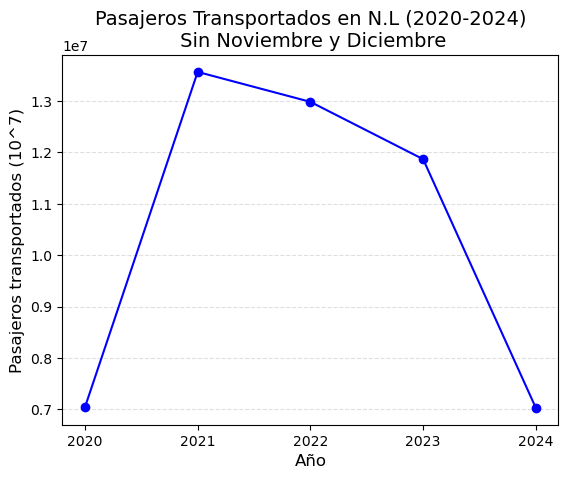

In [27]:
kp= trans[trans['month']!= 'Noviembre']
kk= trans[trans['month']!= 'Diciembre']
lance=kk[['year','Pasajeros transportados-total']].groupby('year').sum().reset_index()
lance.sort_values(by= 'year')

plt.plot(lance['year'],lance['Pasajeros transportados-total'], color= 'blue', marker='o')
# Personalizar el gráfico
plt.title("Pasajeros Transportados en N.L (2020-2024)\n Sin Noviembre y Diciembre", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Pasajeros transportados (10^7)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(np.arange(2020, 2025, 1))# Mostrar el rango de etiquetas en eje x
# Mostrar gráfico
plt.show() 

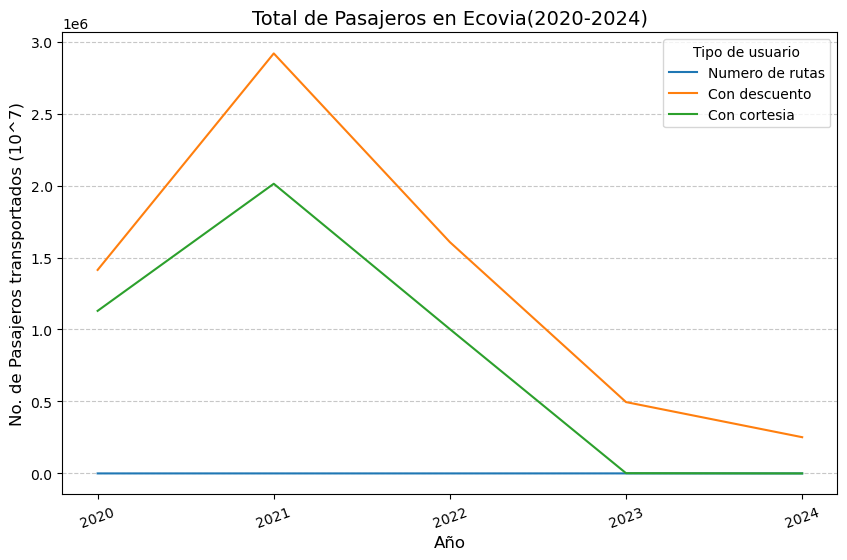

In [28]:
#Ecovia a traves del tiempo y sus tipos de pasajero
rrr=trans[['Numero de rutas','Pasajeros transportados-con descuento',
           'Pasajeros transportados-con cortesia','year']].groupby('year').sum().reset_index()
# Reestructurar datos para facilitar visualización en Seaborn(Voltear dos columnas a varias filas para mejor lectura del df)
octis = rrr.melt(id_vars="year", 
                          var_name="Tipo de usuario", 
                          value_name="No. Pasajeros")

# Renombrar categorías para mayor claridad
octis["Tipo de usuario"] = octis["Tipo de usuario"].replace({
    "Pasajeros transportados-tarifa completa": "Tarifa completa",
    "Pasajeros transportados-con descuento": "Con descuento",
    "Pasajeros transportados-con cortesia":"Con cortesia"
})

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.lineplot(data=octis, x="year", y="No. Pasajeros", hue="Tipo de usuario")

# Personalizar el gráfico
plt.title("Total de Pasajeros en Ecovia(2020-2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("No. de Pasajeros transportados (10^7)", fontsize=12)
plt.legend(title="Tipo de usuario")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(np.arange(2020, 2025, 1))
# Mostrar gráfico
plt.show()

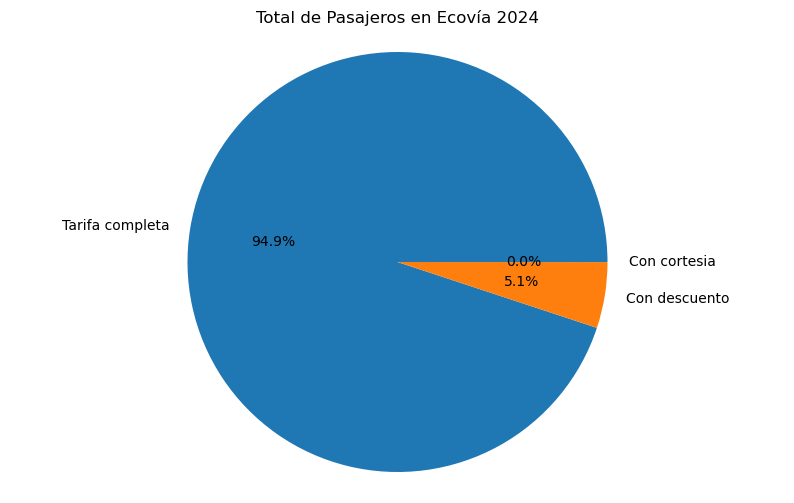

,year,Tipo de usuario,No. Pasajeros
0,2024,Tarifa completa,4718703.0
1,2024,Con descuento,252027.0
2,2024,Con cortesia,381.0


In [7]:
#Comparacion de proporciones de tipo de usuario
#NOTA: para los dos tipos de descuento ofrecido no hay datos para los meses de septiembre a fin de año en 2024
#Solo faltan eliminar las ultimas dos filas
pppp=trans[trans['ecovia']==1]
conan = pppp.iloc[:-2] #---ya se uso
plt.figure(figsize=(10, 6))
konan = conan[conan['year']== 2024]
mk = konan[['Pasajeros transportados-tarifa completa','Pasajeros transportados-con descuento',
           'Pasajeros transportados-con cortesia','year']].groupby('year').sum().reset_index()
# Reestructurar datos para facilitar visualización en Seaborn(Voltear dos columnas a varias filas para mejor lectura del df)
melted = mk.melt(id_vars="year", 
                          var_name="Tipo de usuario", 
                          value_name="No. Pasajeros")

# Renombrar categorías para mayor claridad
melted["Tipo de usuario"] = melted["Tipo de usuario"].replace({
    "Pasajeros transportados-tarifa completa": "Tarifa completa",
    "Pasajeros transportados-con descuento": "Con descuento",
    "Pasajeros transportados-con cortesia":"Con cortesia"
})
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(melted["No. Pasajeros"], labels= melted['Tipo de usuario'], autopct='%1.1f%%') 
#necesita una lista o Serie con los valores que representan las porciones del gráfico.
#Debes pasar melted["No. Pasajeros"] en lugar de melted.
plt.title('Total de Pasajeros en Ecovía 2024')
plt.axis('equal')
plt.show()
melted

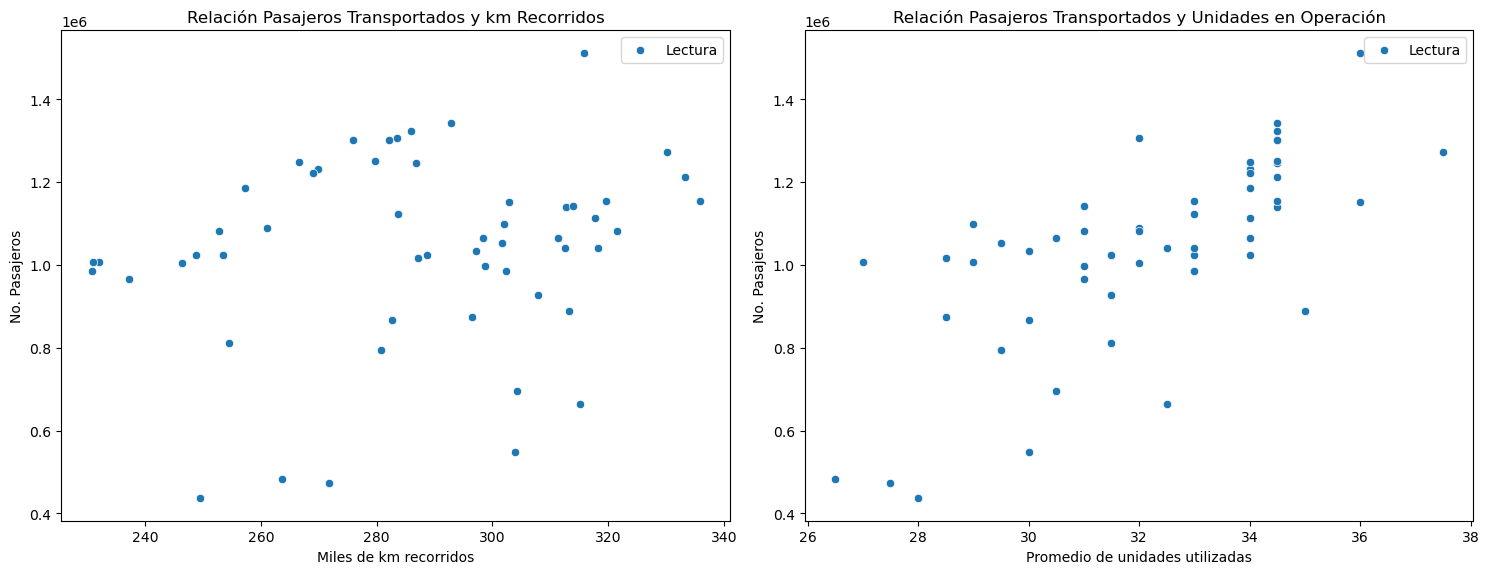

In [8]:
gonzalo= pppp[['Pasajeros transportados-total','Miles de km recorridos','Unidades en operacion de L-V','Unidades en operacion de S-D']]
gonzalo['Prom_unidades']= gonzalo[['Unidades en operacion de L-V','Unidades en operacion de S-D']].mean(axis=1)
fig=plt.figure(figsize=(15, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

#plt.subplot(1, 2, 1)
sns.scatterplot(y='Pasajeros transportados-total', x='Miles de km recorridos', data=gonzalo, label='Lectura', ax=ax0)
ax0.set_ylabel('No. Pasajeros')
ax0.set_xlabel('Miles de km recorridos')
ax0.set_title('Relación Pasajeros Transportados y km Recorridos')

#plt.subplot(1, 2, 2)
sns.scatterplot(x='Prom_unidades', y='Pasajeros transportados-total', data= gonzalo, label='Lectura',ax=ax1)
ax1.set_ylabel('No. Pasajeros')
ax1.set_xlabel('Promedio de unidades utilizadas')
ax1.set_title('Relación Pasajeros Transportados y Unidades en Operación')

plt.tight_layout()
plt.show()

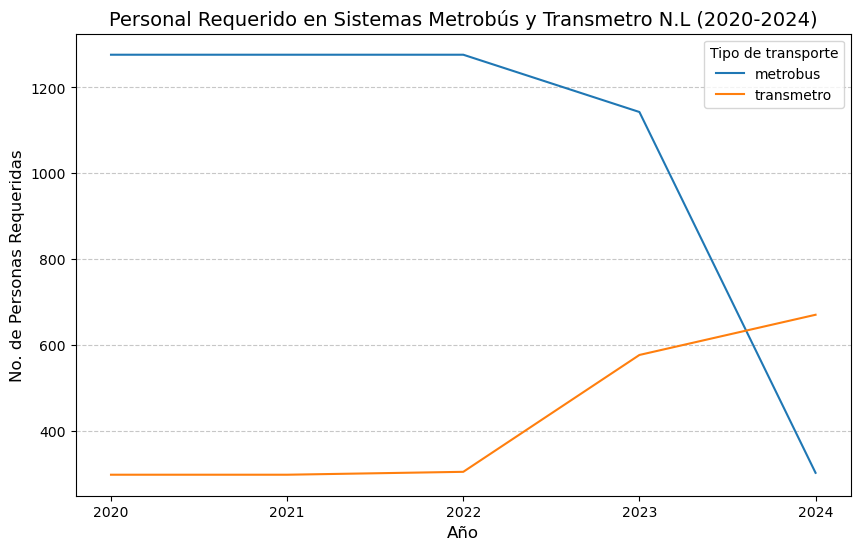

In [31]:
#personal ocupado y rutas metrobus y transmetro
der = trans[trans['Medio']!= 'metro']
sauer = der[der['Medio']!= 'ecovia']
apfel= sauer[['Personal ocupado','Medio','year']].groupby(['year','Medio']).mean().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.lineplot(data=apfel, x="year", y="Personal ocupado", hue="Medio")

# Personalizar el gráfico
plt.title("Personal Requerido en Sistemas Metrobús y Transmetro N.L (2020-2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("No. de Personas Requeridas", fontsize=12)
plt.legend(title="Tipo de transporte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(np.arange(2020, 2025, 1))
# Mostrar gráfico
plt.show()

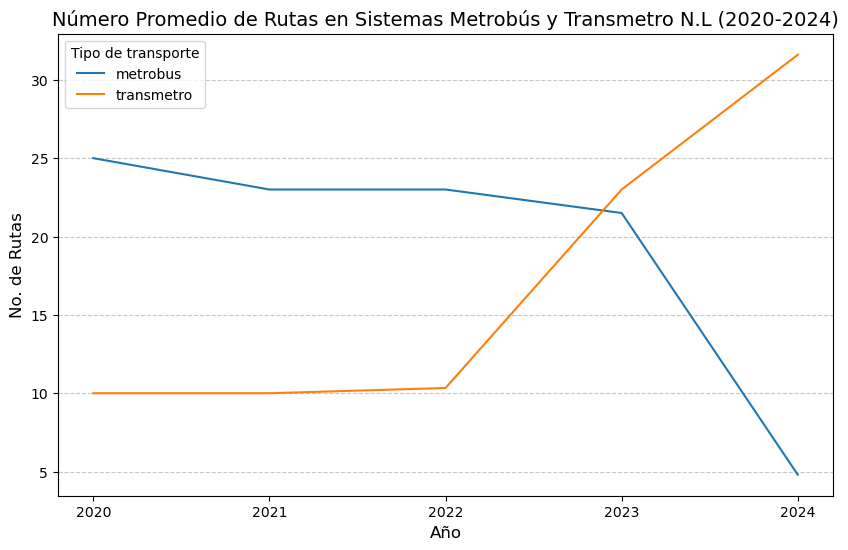

In [32]:
#personal ocupado y rutas metrobus y transmetro
pfirsich = sauer[['Numero de rutas', 'Medio','year']].groupby(['year','Medio']).mean().reset_index()
# Reestructurar datos para facilitar visualización en Seaborn(Voltear dos columnas a varias filas para mejor lectura del df)

plt.figure(figsize=(10, 6))
sns.lineplot(data=pfirsich, x="year", y="Numero de rutas", hue="Medio")

# Personalizar el gráfico
plt.title("Número Promedio de Rutas en Sistemas Metrobús y Transmetro N.L (2020-2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("No. de Rutas", fontsize=12)
plt.legend(title="Tipo de transporte")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(np.arange(2020, 2025, 1))
# Mostrar gráfico
plt.show()

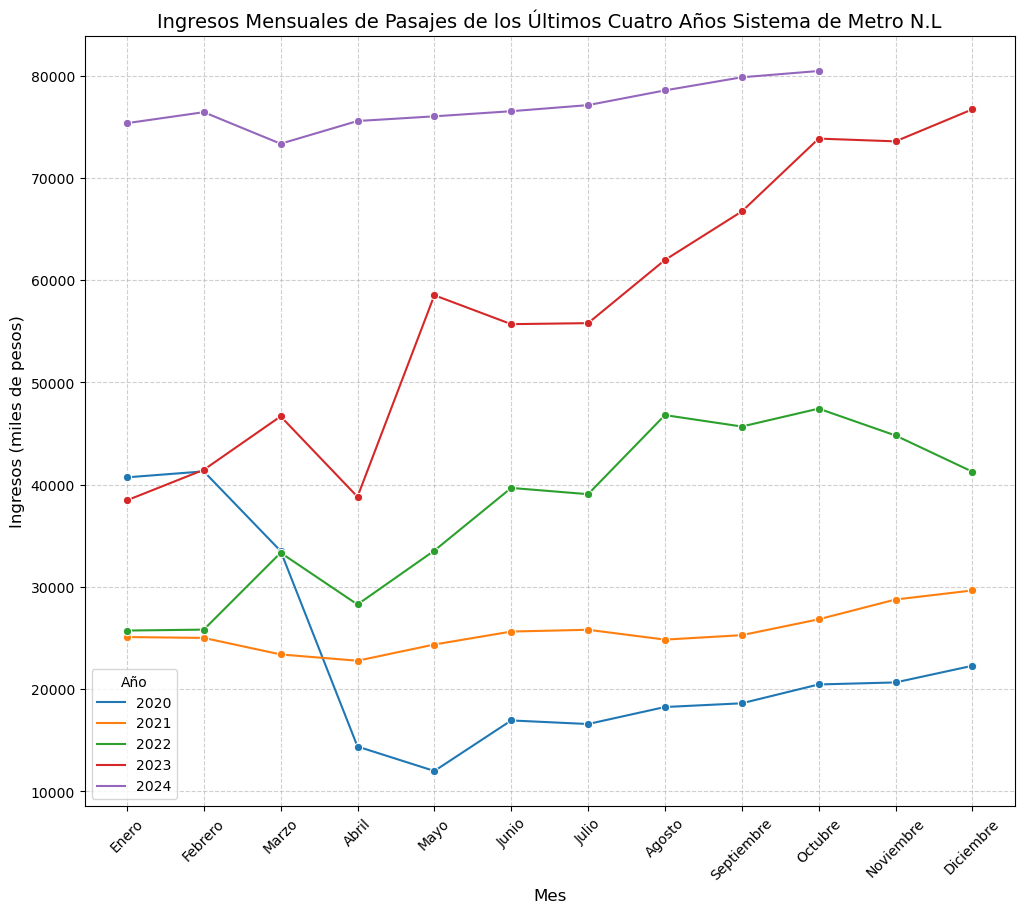

In [33]:
#datos de metro
johan= trans[trans['Medio']== 'metro'].reset_index(drop= True)
borracho=johan[['year','Ingresos miles de pesos de pasajes','month']].reset_index(drop= True)
borracho['month']= pd.Categorical(borracho['month'], categories=meses, ordered=True)

plt.figure(figsize=(12, 10))
sns.lineplot(data=borracho, x="month", y="Ingresos miles de pesos de pasajes", hue="year", marker="o", palette="tab10")

# Mejorar etiquetas y título
plt.title("Ingresos Mensuales de Pasajes de los Últimos Cuatro Años Sistema de Metro N.L", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ingresos (miles de pesos)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar el gráfico
plt.show()

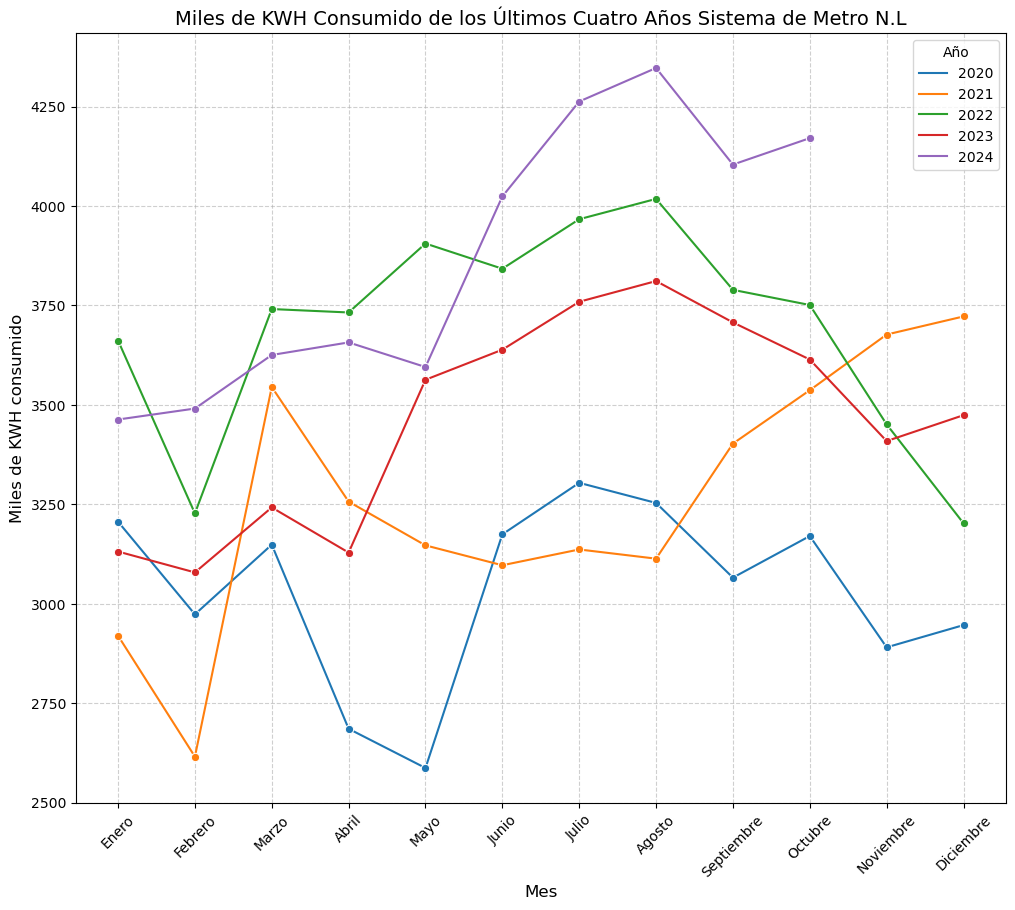

In [34]:
#datos de metro
aa=johan[['year','Miles de KWH consumido','month']].reset_index(drop= True)
aa['month']= pd.Categorical(aa['month'], categories=meses, ordered=True)

plt.figure(figsize=(12, 10))
sns.lineplot(data=aa, x="month", y="Miles de KWH consumido", hue="year", marker="o", palette="tab10")

# Mejorar etiquetas y título
plt.title("Miles de KWH Consumido de los Últimos Cuatro Años Sistema de Metro N.L", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Miles de KWH consumido", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar el gráfico
plt.show()

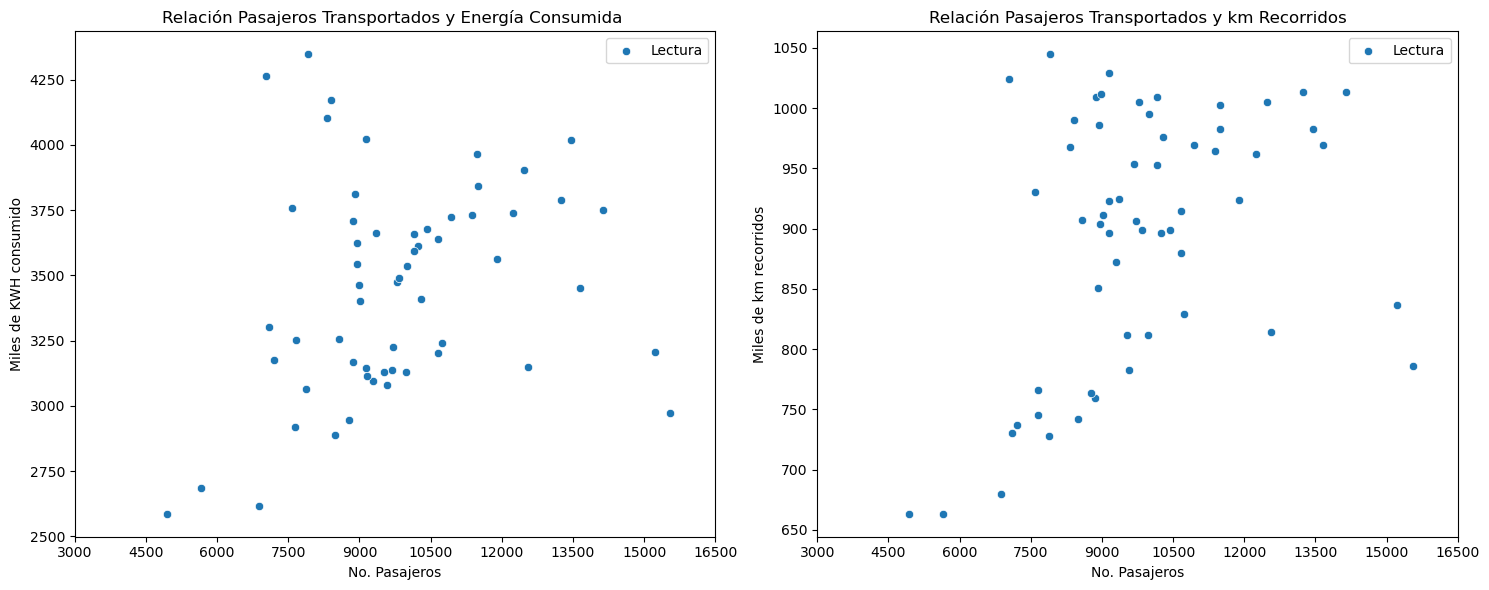

In [35]:
lorna= johan[['Miles de KWH consumido','Pasajeros transportados-total','Miles de km recorridos','Medio']].reset_index(drop=True)
fig=plt.figure(figsize=(15, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

#plt.subplot(1, 2, 1)
sns.scatterplot(x='Pasajeros transportados-total', y='Miles de KWH consumido', data=lorna, label='Lectura', ax=ax0)
ax0.set_xlabel('No. Pasajeros')
ax0.set_ylabel('Miles de KWH consumido')
ax0.set_title('Relación Pasajeros Transportados y Energía Consumida ')
ax0.set_xticks(np.arange(3000, 17000, 1500))

#plt.subplot(1, 2, 2)
sns.scatterplot(y='Miles de km recorridos', x='Pasajeros transportados-total', data= lorna, label='Lectura',ax=ax1)
ax1.set_xlabel('No. Pasajeros')
ax1.set_ylabel('Miles de km recorridos')
ax1.set_title('Relación Pasajeros Transportados y km Recorridos')
ax1.set_xticks(np.arange(3000, 17000, 1500))

plt.tight_layout()
plt.show()

In [36]:
trans.head(2)

,Unidades en operacion de L-V,Unidades en operacion de S-D,Miles de km recorridos,Pasajeros transportados-total,month,year,ecovia,metro,metrobus,transmetro,Pasajeros transportados-tarifa completa,Pasajeros transportados-con descuento,Pasajeros transportados-con cortesia,Numero de rutas,Personal ocupado,Ingresos miles de pesos de pasajes,Miles de KWH consumido,Medio
0,38.0,25.0,254.439,811646.0,Mayo,2020,1,0,0,0,557095.0,137544.0,117007.0,NaN,NaN,NaN,NaN,ecovia
1,39.0,24.0,248.738,1024395.0,Junio,2020,1,0,0,0,694198.0,182774.0,147423.0,NaN,NaN,NaN,NaN,ecovia


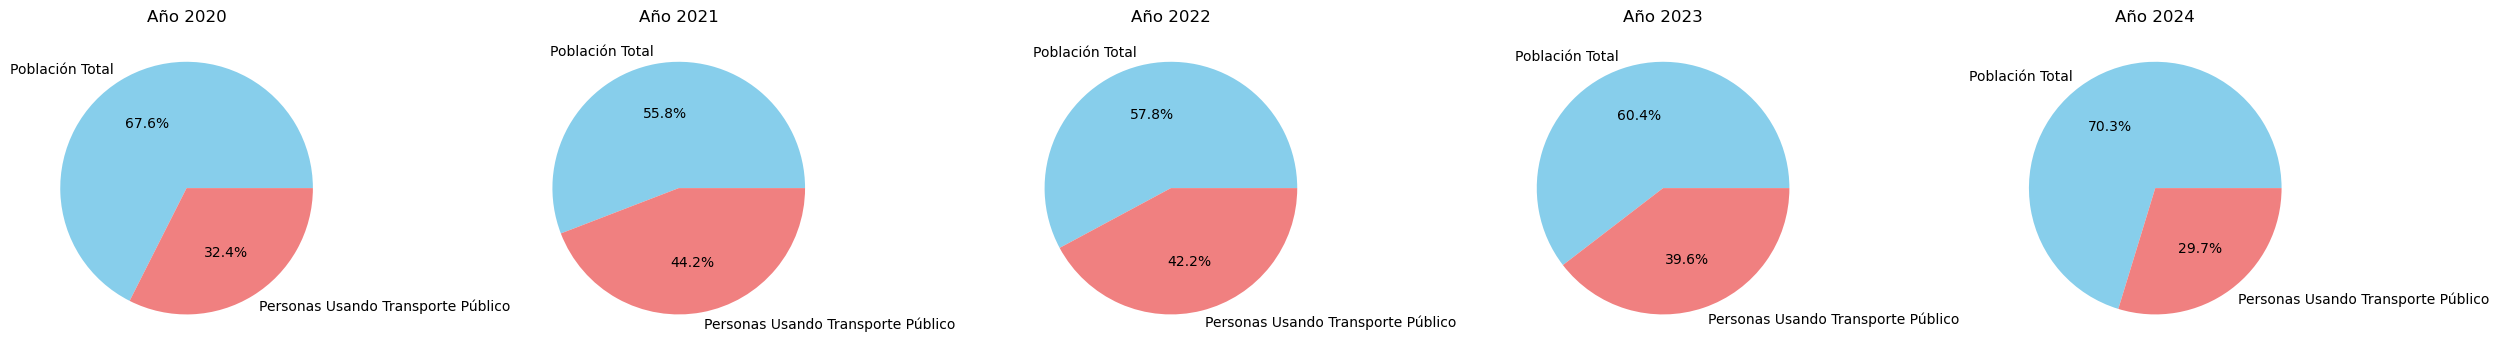

In [37]:
pls= populi[populi['Year']>=2020]
tracer= pls[['Year','Poblacion_total']].groupby('Year').mean().reset_index()
tracer.columns = ["year", "Poblacion_total"]
winton= trans[trans['year']>= 2020]
widow = winton[['year', 'Pasajeros transportados-total']].groupby('year').mean().reset_index()
ana= pd.merge(tracer, widow, on= 'year')
ana

fig, axes = plt.subplots(1, 5, figsize=(25, 15))

for i, row in ana.iterrows():
    values = [row["Poblacion_total"], row["Pasajeros transportados-total"]]
    labels = ["Población Total", "Personas Usando Transporte Público"]
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    axes[i].set_title(f"Año {int(row['year'])}")

plt.tight_layout()
plt.show()

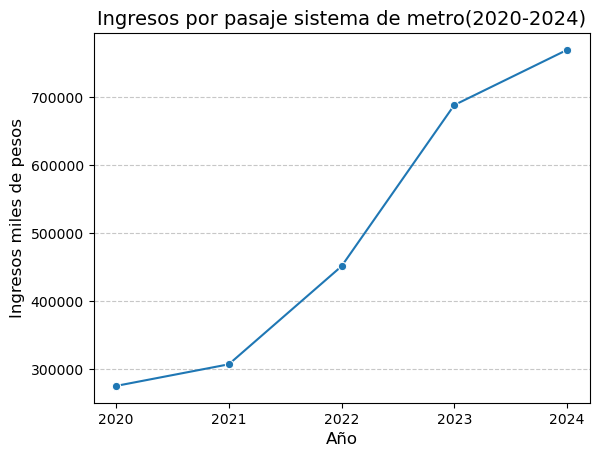

In [38]:
plum= trans[trans['Medio']== 'metro'].reset_index(drop= True)
pear= plum[['Ingresos miles de pesos de pasajes','year']].groupby('year').sum().reset_index()

sns.lineplot(data= pear, x= 'year', y= 'Ingresos miles de pesos de pasajes', marker ="o")
plt.title("Ingresos por pasaje sistema de metro(2020-2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Ingresos miles de pesos", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(np.arange(2020, 2025, 1))
plt.show()